In [23]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [2]:
# Import dataset 
df = pd.read_csv(r"C:\Users\cease\Documents\Datasets\End to End Projects\New Data\Battery_RUL.csv")
df.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [4]:
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


### plot histograms to determine data distribution

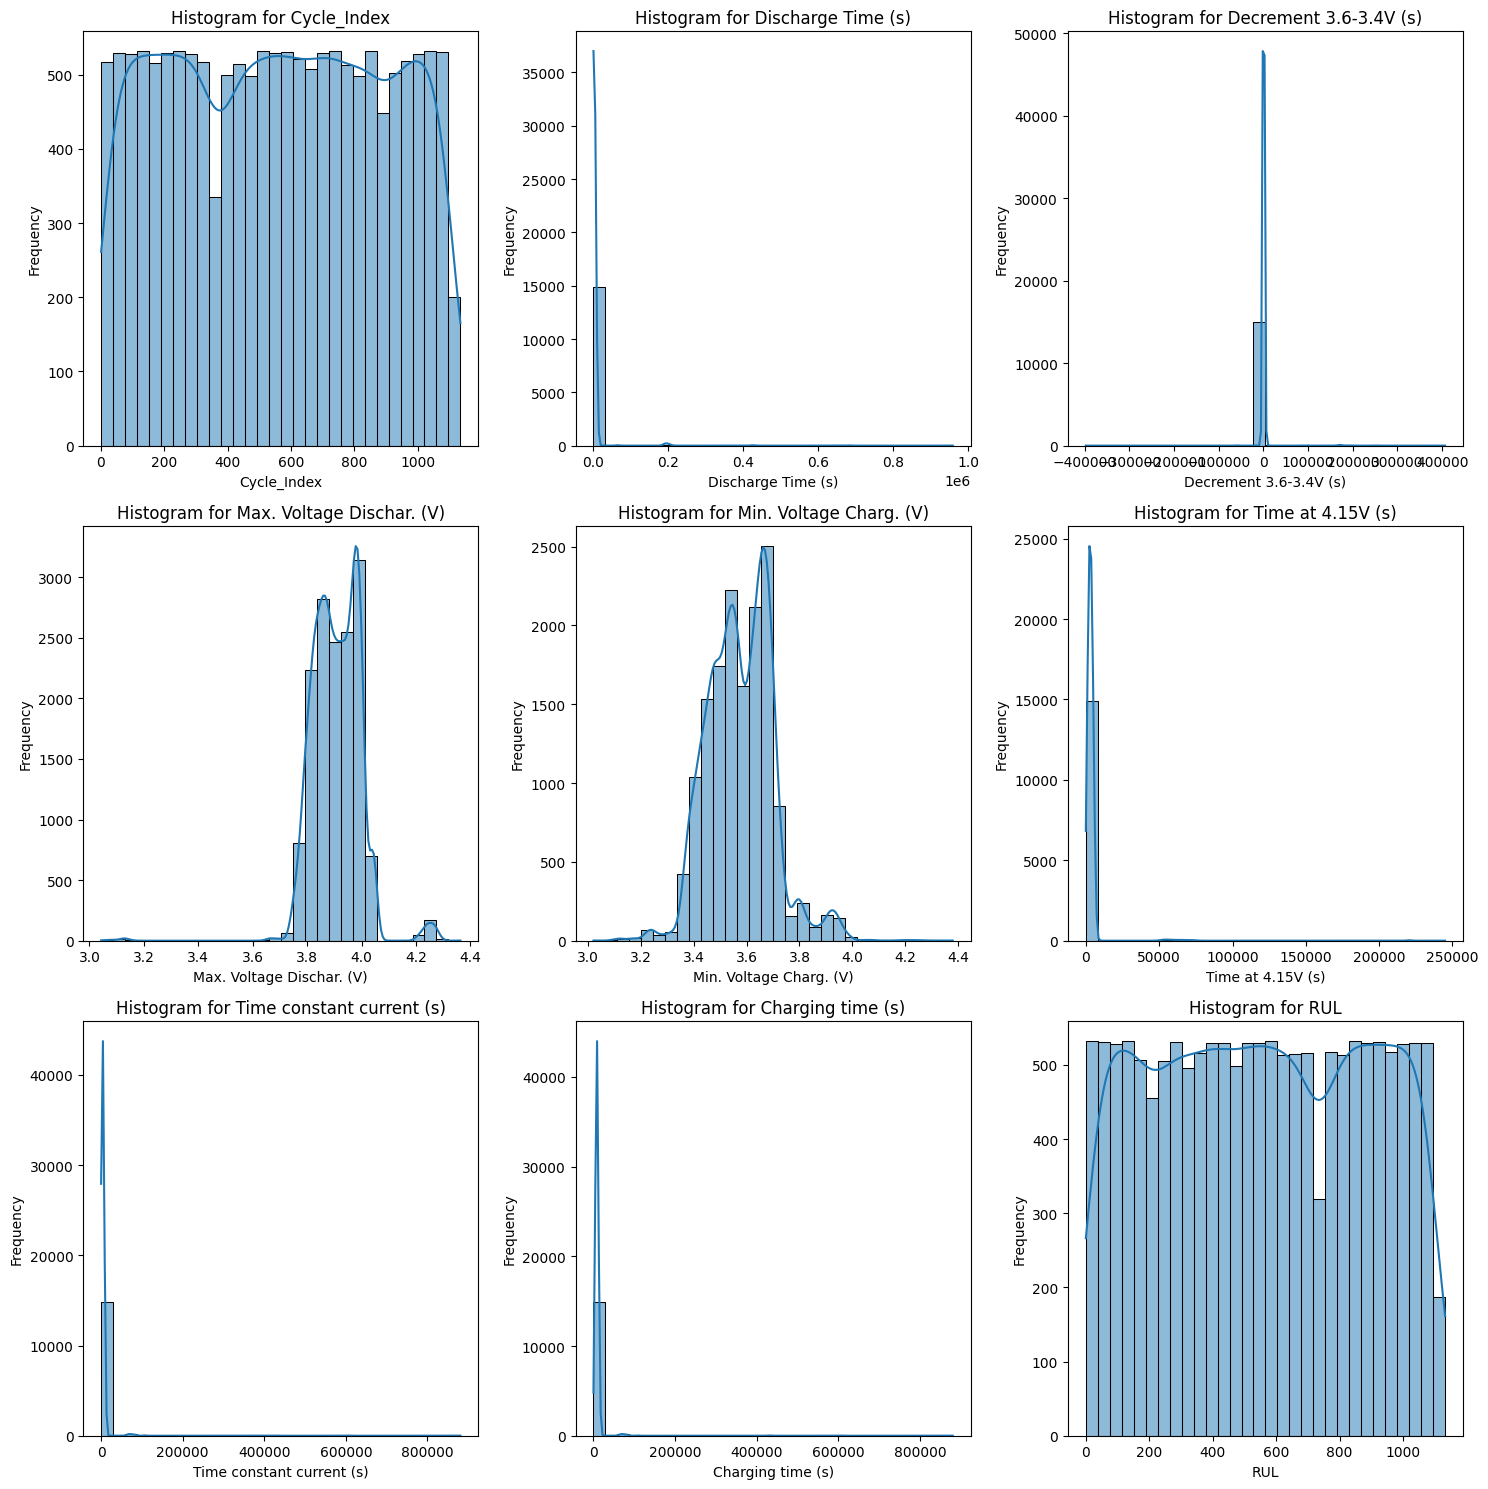

In [6]:

# Select numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include='number').columns

# Define the grid layout
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each numeric column
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide the empty subplots
for j in range(i + 1, rows * cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


### Plot box plot to check for outliers

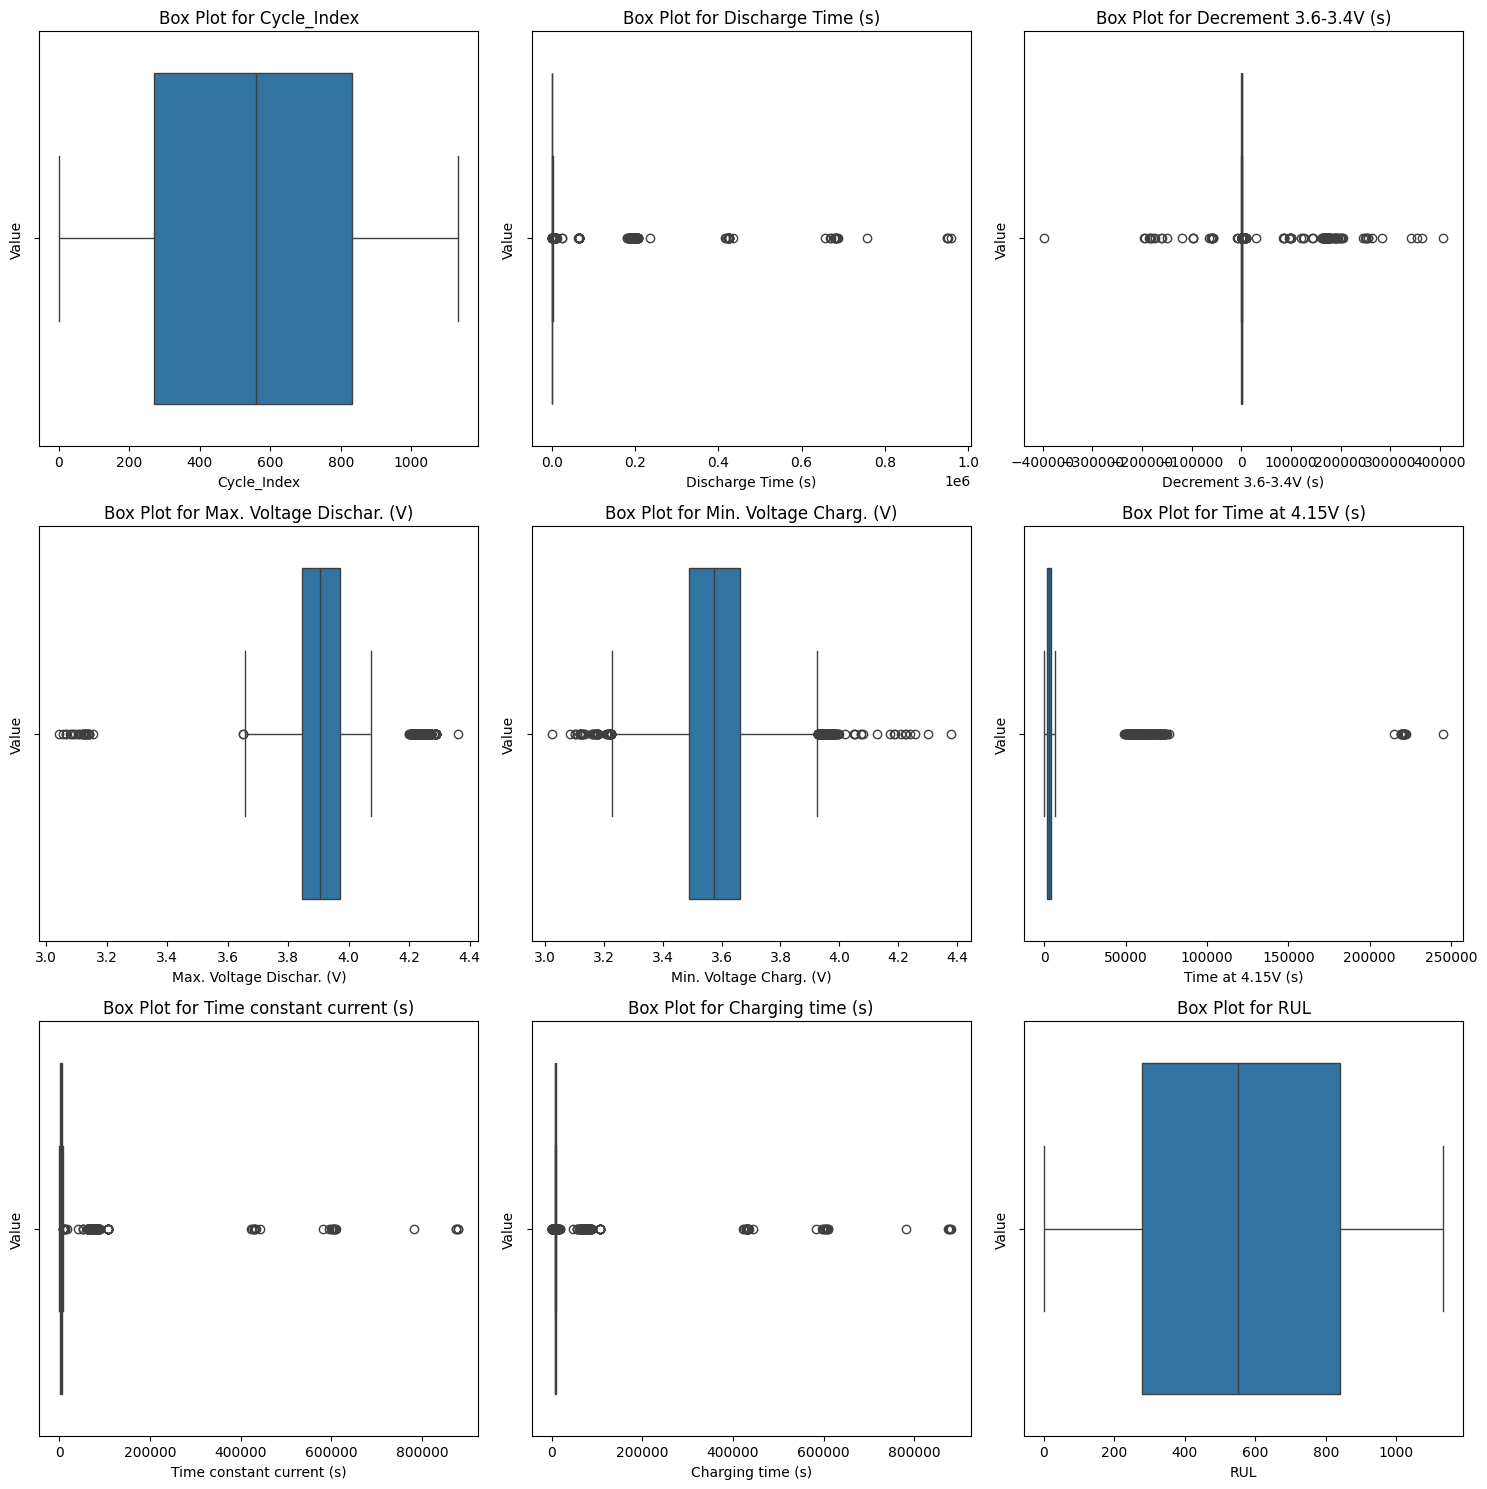

In [7]:

# Select numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include='number').columns

# Define the grid layout
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot box plots for each numeric column
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')

# Hide the empty subplots
for j in range(i + 1, rows * cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### How features are correlating to target variable

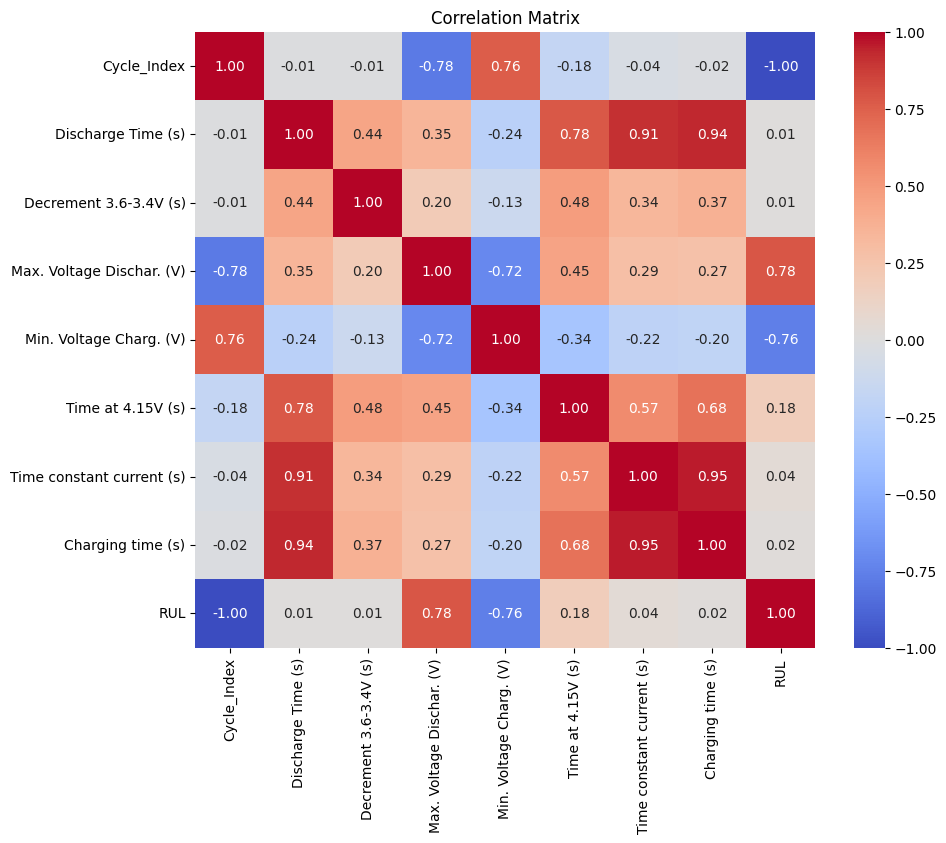

In [5]:
# Select numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include='number').columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Use z score for removing outliers 

In [8]:
from scipy.stats import zscore

# Select numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include='number').columns

# Calculate z-scores for each numeric column
z_scores = np.abs(df[numeric_columns].apply(zscore))

# Set the threshold for identifying outliers
threshold = 2.5

# Filter the DataFrame to remove rows with any z-score greater than the threshold
df_filtered = df[(z_scores < threshold).all(axis=1)]

# Display the number of rows before and after filtering
print(f'Original number of rows: {df.shape[0]}')
print(f'Number of rows after filtering: {df_filtered.shape[0]}')

# Display the first few rows of the filtered DataFrame
df_filtered.head()


Original number of rows: 15064
Number of rows after filtering: 14458


,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
6,8.0,5955.30,1220.135329,4.013,3.501,5017.495000,5967.55,5967.55,1105
7,9.0,5951.20,1220.135329,4.014,3.501,5017.496000,5962.21,5962.21,1104
8,10.0,5945.44,1216.920914,4.014,3.501,5009.993667,5954.91,5954.91,1103
10,12.0,3228.58,1135.349333,3.689,3.485,5033.075692,5969.89,5969.89,1101
11,13.0,6019.90,1058.279724,4.045,3.475,5053.842846,5980.77,5980.77,1100


In [11]:
df_filtered.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,14458.000000,14458.000000,14458.000000,14458.000000,14458.000000,14458.000000,14458.000000,14458.000000,14458.000000
mean,553.345207,1563.618926,468.523485,3.905939,3.574367,2992.371361,3832.535707,8303.556410,556.984369
std,319.759393,545.262023,198.491489,0.073339,0.105305,1222.915435,1387.084051,738.665088,319.827073
min,7.000000,168.000000,-8223.895833,3.685000,3.355000,471.906000,1071.000000,5870.720000,1.000000
25%,271.000000,1174.100000,321.200000,3.847000,3.491000,1856.765250,2600.252500,7829.667500,282.000000
50%,553.000000,1559.035000,440.571429,3.907000,3.571000,2942.348000,3824.340000,8306.430000,557.000000
75%,828.000000,1900.530000,596.000000,3.970000,3.660000,4061.959750,5012.310000,8755.797500,840.000000
max,1132.000000,25519.560000,3468.172000,4.053000,3.886000,6826.609250,42043.440000,47472.810000,1127.000000


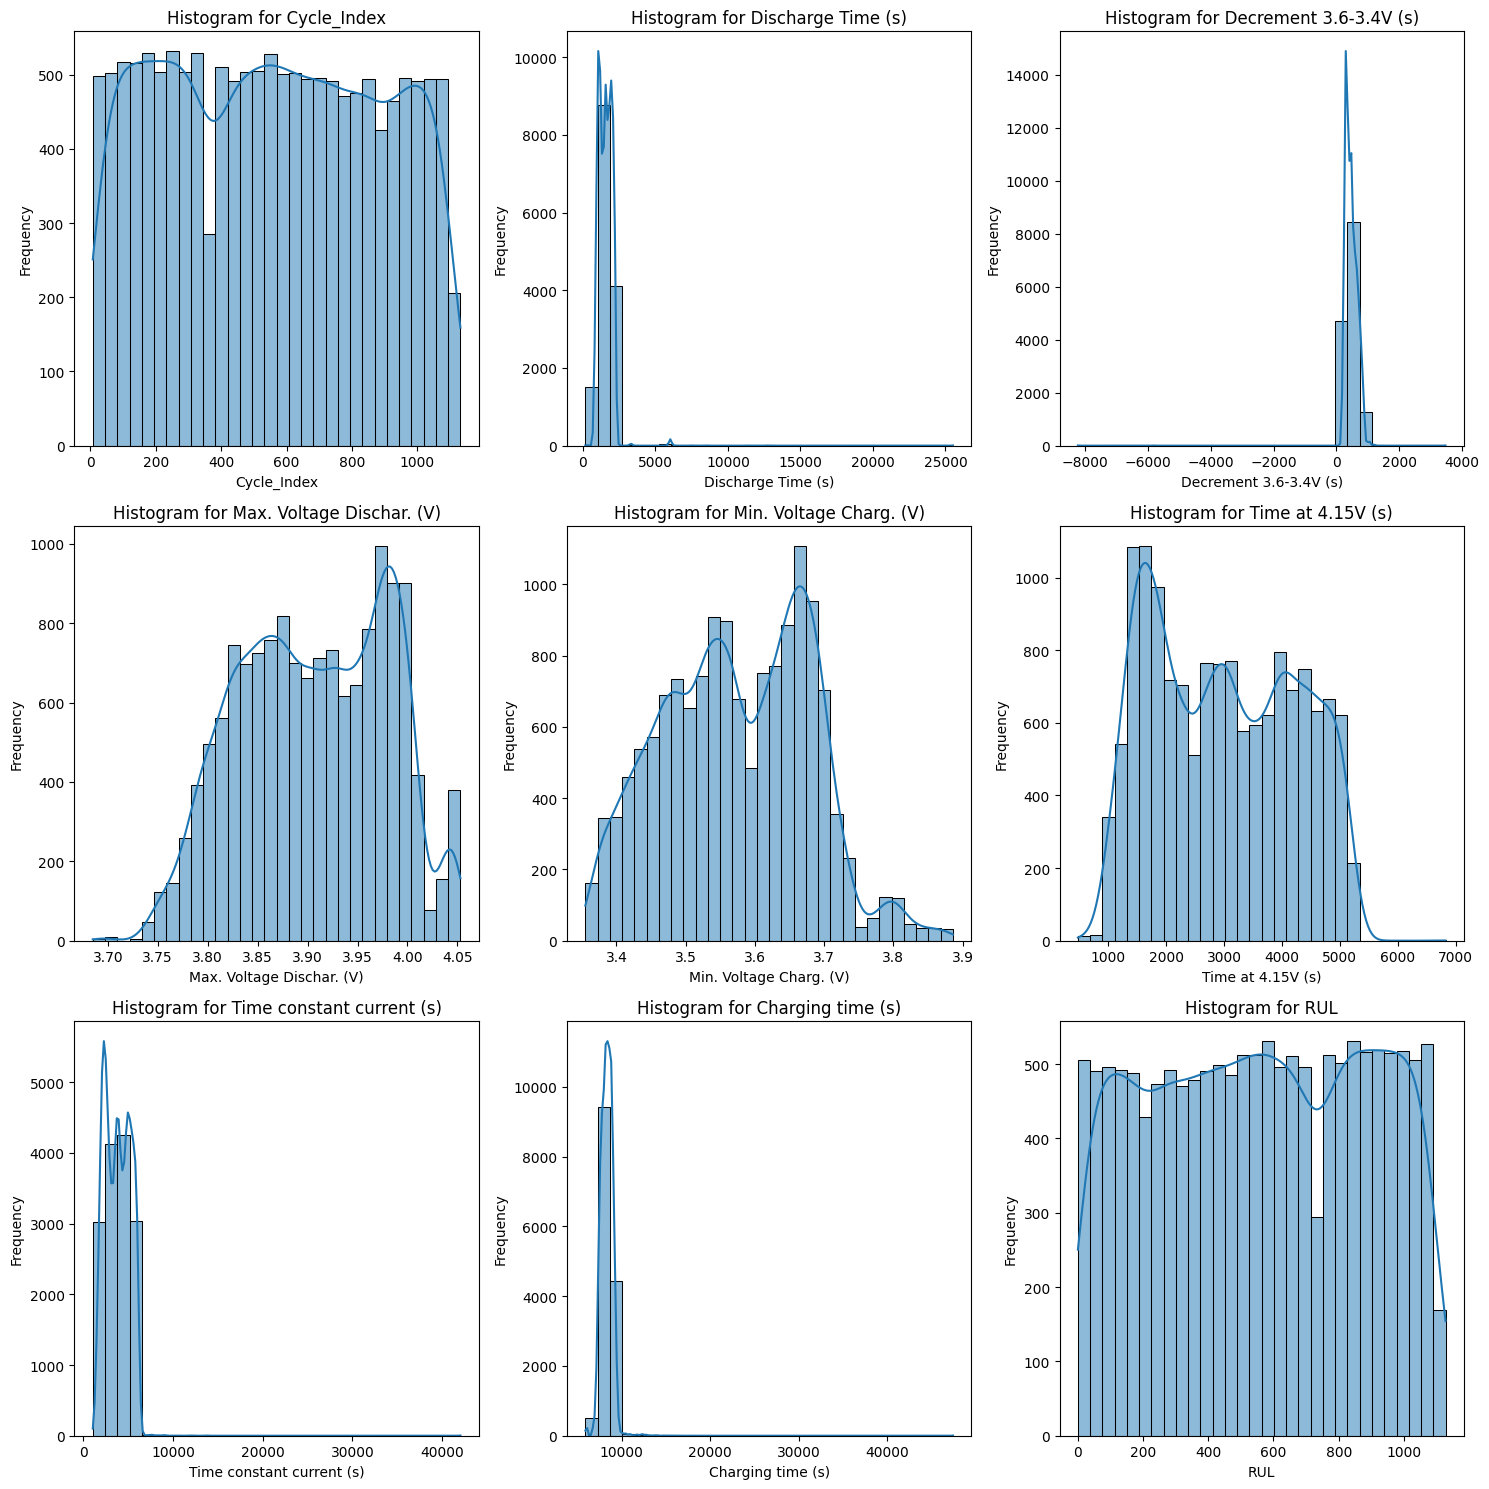

In [9]:

# Select numeric columns from the DataFrame
numeric_columns = df_filtered.select_dtypes(include='number').columns

# Define the grid layout
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each numeric column
for i, column in enumerate(numeric_columns):
    sns.histplot(df_filtered[column], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide the empty subplots
for j in range(i + 1, rows * cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Feature Elimination 

### Correlation

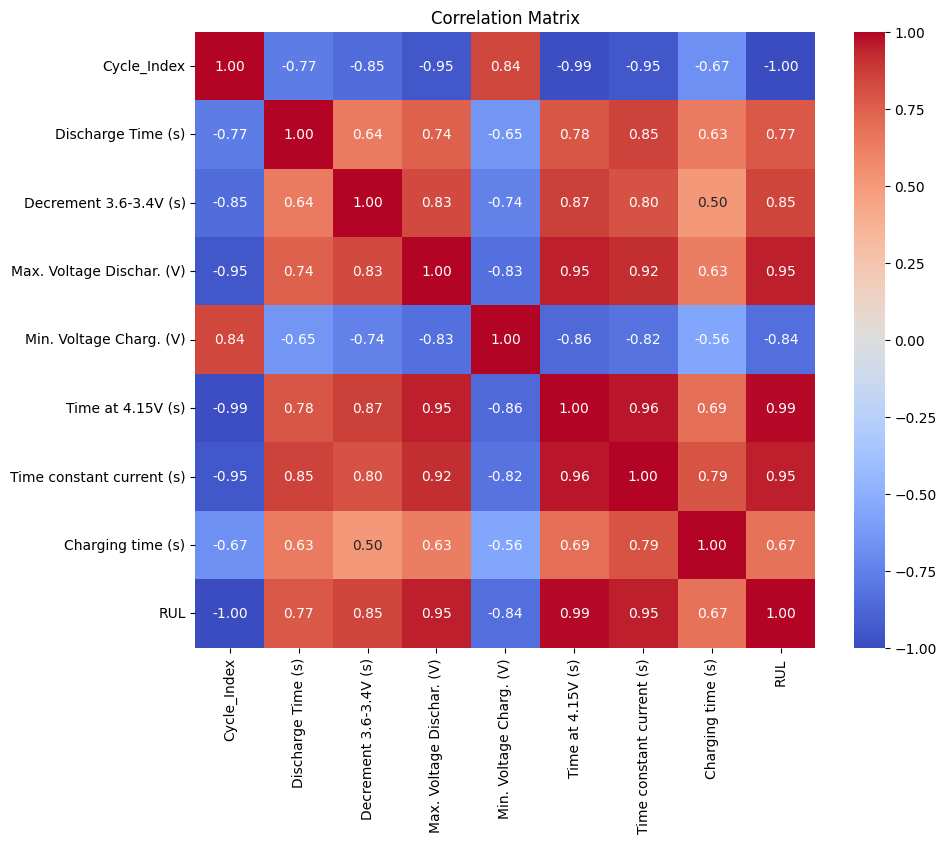

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns from the DataFrame
numeric_columns = df_filtered.select_dtypes(include='number').columns

# Calculate the correlation matrix
correlation_matrix = df_filtered[numeric_columns].corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [12]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14458 entries, 6 to 15062
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                14458 non-null  float64
 1   Discharge Time (s)         14458 non-null  float64
 2   Decrement 3.6-3.4V (s)     14458 non-null  float64
 3   Max. Voltage Dischar. (V)  14458 non-null  float64
 4   Min. Voltage Charg. (V)    14458 non-null  float64
 5   Time at 4.15V (s)          14458 non-null  float64
 6   Time constant current (s)  14458 non-null  float64
 7   Charging time (s)          14458 non-null  float64
 8   RUL                        14458 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.1 MB


In [13]:
df_filtered.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,14458.000000,14458.000000,14458.000000,14458.000000,14458.000000,14458.000000,14458.000000,14458.000000,14458.000000
mean,553.345207,1563.618926,468.523485,3.905939,3.574367,2992.371361,3832.535707,8303.556410,556.984369
std,319.759393,545.262023,198.491489,0.073339,0.105305,1222.915435,1387.084051,738.665088,319.827073
min,7.000000,168.000000,-8223.895833,3.685000,3.355000,471.906000,1071.000000,5870.720000,1.000000
25%,271.000000,1174.100000,321.200000,3.847000,3.491000,1856.765250,2600.252500,7829.667500,282.000000
50%,553.000000,1559.035000,440.571429,3.907000,3.571000,2942.348000,3824.340000,8306.430000,557.000000
75%,828.000000,1900.530000,596.000000,3.970000,3.660000,4061.959750,5012.310000,8755.797500,840.000000
max,1132.000000,25519.560000,3468.172000,4.053000,3.886000,6826.609250,42043.440000,47472.810000,1127.000000


## Modelling

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# Preprocessing 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Evaluation 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# time 
import time

In [15]:
# Define the featuires and target variable 

# drop null values
df = df_filtered.dropna()

# Features 
X = df_filtered.drop(columns={'RUL'})

# Target variable 
y = df_filtered['RUL']

In [16]:
# Training set and testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=127)

In [18]:
# Initialize the standard scaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

In [21]:
# Define the models
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'KNN Regression': KNeighborsRegressor(),
    'LGBM Regressor': LGBMRegressor(),
    'CatBoost Regressor': CatBoostRegressor(verbose=0),
    'XGB Regressor': XGBRegressor()
}

# Initialize a dictionary to store results
results = {
    'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'MAPE': [], 'R2': [],
    'Training Time (s)': [], 'Prediction Time (s)': []
}

# Create a loop to iterate over the models
for model_name, model in models.items():
    # Measure the training time
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time

    # Measure the prediction time
    start_time = time.time()
    y_pred = model.predict(X_test_scaled)
    prediction_time = time.time() - start_time

    # Evaluating the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    # Store results in a dictionary
    results['Model'].append(model_name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R2'].append(r2)
    results['MAPE'].append(mape)
    results['Training Time (s)'].append(training_time)
    results['Prediction Time (s)'].append(prediction_time)

# Create a DataFrame for results in dictionary
results_df = pd.DataFrame(results)

# Display the results
results_df.head(8)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2031
[LightGBM] [Info] Number of data points in the train set: 11566, number of used features: 8
[LightGBM] [Info] Start training from score 559.662027


,Model,MAE,MSE,RMSE,MAPE,R2,Training Time (s),Prediction Time (s)
0,Decision Tree,2.146957,24.900761,4.990066,1.403664,0.999759,0.280000,0.001001
1,Extra Trees,1.428555,7.650783,2.766005,0.929785,0.999926,8.301997,0.097008
2,Random Forest,1.951698,11.895332,3.448961,1.312900,0.999885,23.058025,0.083995
3,Gradient Boosting,4.806186,52.099351,7.217988,3.074558,0.999495,6.162291,0.004998
4,KNN Regression,2.164177,17.454744,4.177888,2.369075,0.999831,0.034005,0.032996
5,LGBM Regressor,2.768232,17.254463,4.153849,1.754295,0.999833,0.334589,0.008997
6,CatBoost Regressor,3.560740,32.000279,5.656879,2.016148,0.999690,4.709617,0.005999
7,XGB Regressor,2.499305,13.787302,3.713126,1.704450,0.999866,0.194000,0.003999


### Plotting 

In [25]:
# Plotting a grouped bar graph

fig = px.bar(results_df, x='Model',
             y=['MAE', 'MSE', 'RMSE', 'MAPE', 'R2', 'Training Time (s)', 'Prediction Time (s)'],
             labels={'value': 'Metric Value'}, 
             title='Best Model',
             barmode = 'group')

# Update layout to vary length and width
fig.update_layout(
    width=1000,  # Set the width of the entire plot
    height=700,  # Set the height of the entire plot
    bargap=0.2,  # Set the gap between bars
)
             
fig.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2031
[LightGBM] [Info] Number of data points in the train set: 11566, number of used features: 8
[LightGBM] [Info] Start training from score 559.662027


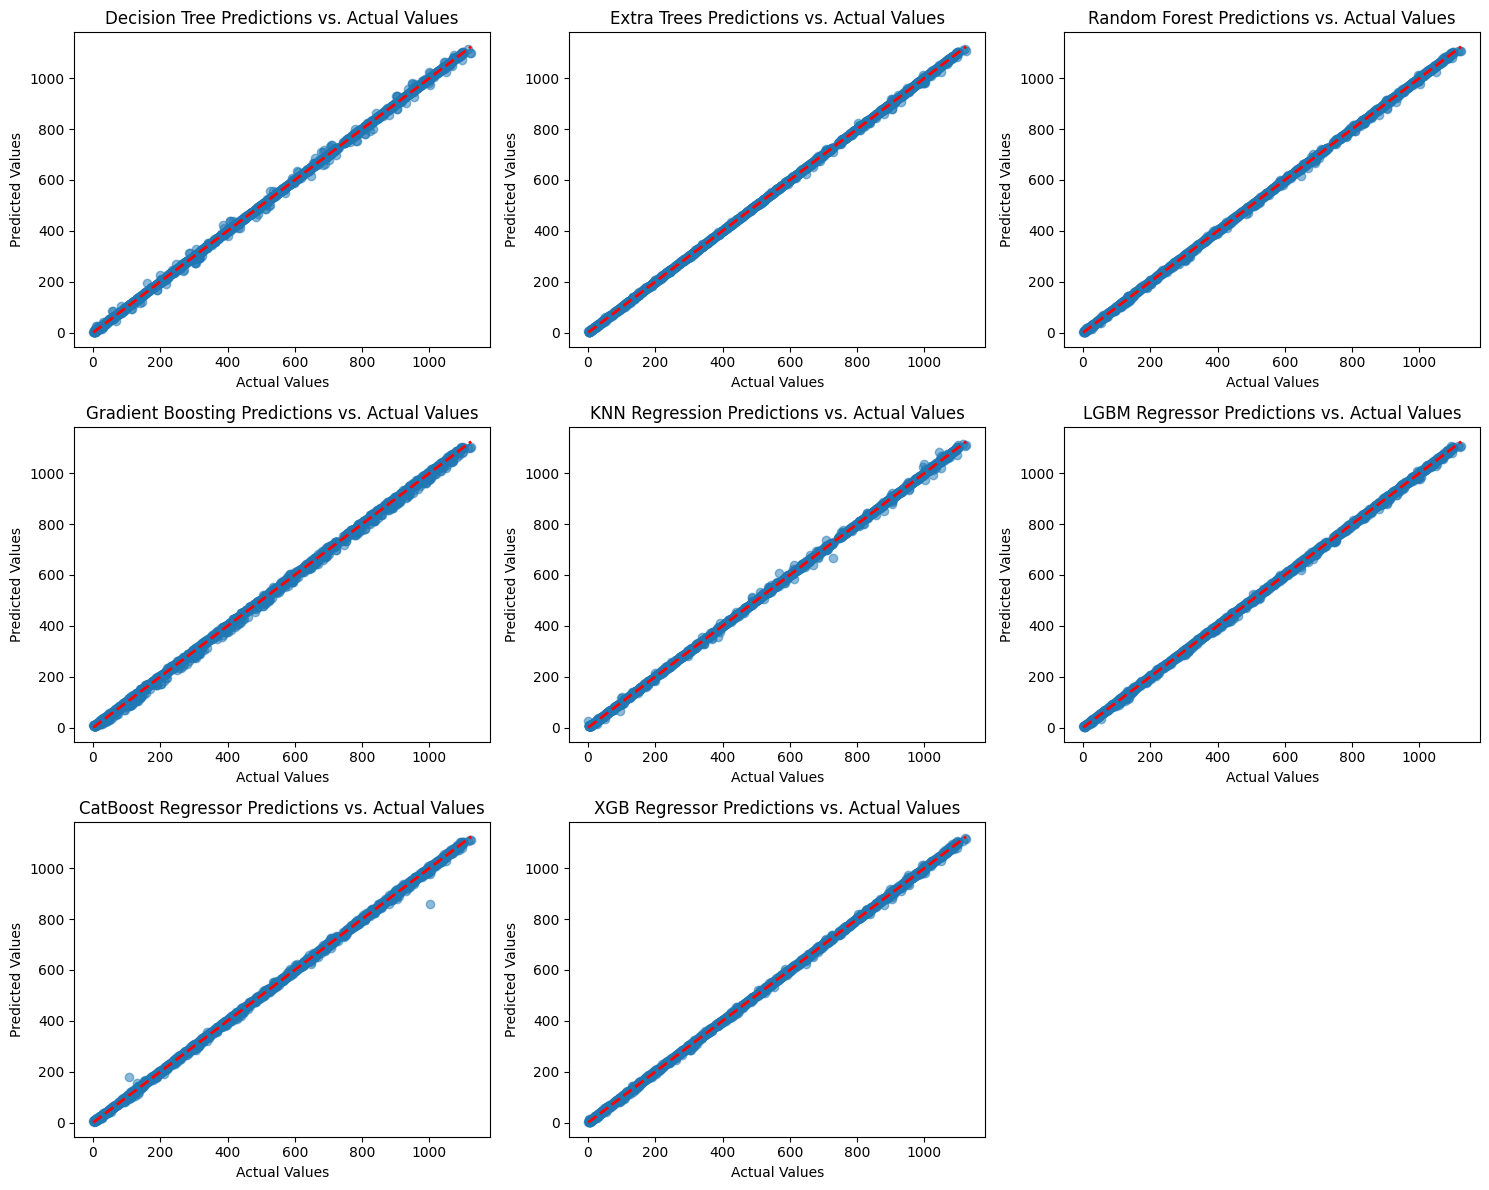

In [29]:
# Scater plot

# Define the grid layout
rows, cols = 3, 3

# Specify the figure size for the entire grid
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Scatter plot of Predictions vs. Actual Values for each model
    plt.subplot(rows, cols, idx)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line for perfect predictions
    plt.title(f'{model_name} Predictions vs. Actual Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

# Adjust layout
plt.tight_layout()
plt.show()

### Residual Plots

A residual plot in regression analysis is a graphical representation of the residuals (the differences between the observed values and the predicted values) plotted against the predicted values. It is a key diagnostic tool that helps assess the fit of a regression model and identify potential problems.

**What a Residual Plot Tells Us:?**

**- Pattern Detection:**
Ideally, the residuals should be randomly scattered around the horizontal axis (residual = 0). This indicates that the model has captured all the systematic information and the remaining noise is random.
If there are discernible patterns (e.g., curves, clusters), it suggests that the model has not adequately captured some aspect of the data. This could mean a missing variable, incorrect functional form, or interaction effects not accounted for.
Homogeneity of Variance (Homoscedasticity):

**- Constant Spread:** 
If the residuals have a constant spread around the horizontal axis across all levels of predicted values, it indicates homoscedasticity. This means the variance of the residuals is constant and the model's predictions are equally reliable across the range of the data.

**- Changing Spread:**
If the residuals fan out or form a funnel shape, this indicates heteroscedasticity. It suggests that the variance of the residuals changes with the level of predicted values, which can be problematic for standard regression assumptions.

**- Model Fit:**
Centered Around Zero: Residuals should be centered around zero, indicating that the model's predictions are, on average, accurate. Systematic deviations from zero can indicate bias.

**-Outliers:**
Residual plots can help identify outliers. Points that lie far from the rest of the residuals suggest that the model performs poorly for these observations and they might require special attention or further investigation.
Independence of Errors:

The ideal residual plot shows residuals randomly scattered around the horizontal axis at zero, with no obvious patterns or structures. The spread of residuals should be roughly constant across all levels of predicted values, indicating homoscedasticity. Residuals should be centered around zero, indicating unbiased predictions.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000617 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2031
[LightGBM] [Info] Number of data points in the train set: 11566, number of used features: 8
[LightGBM] [Info] Start training from score 559.662027


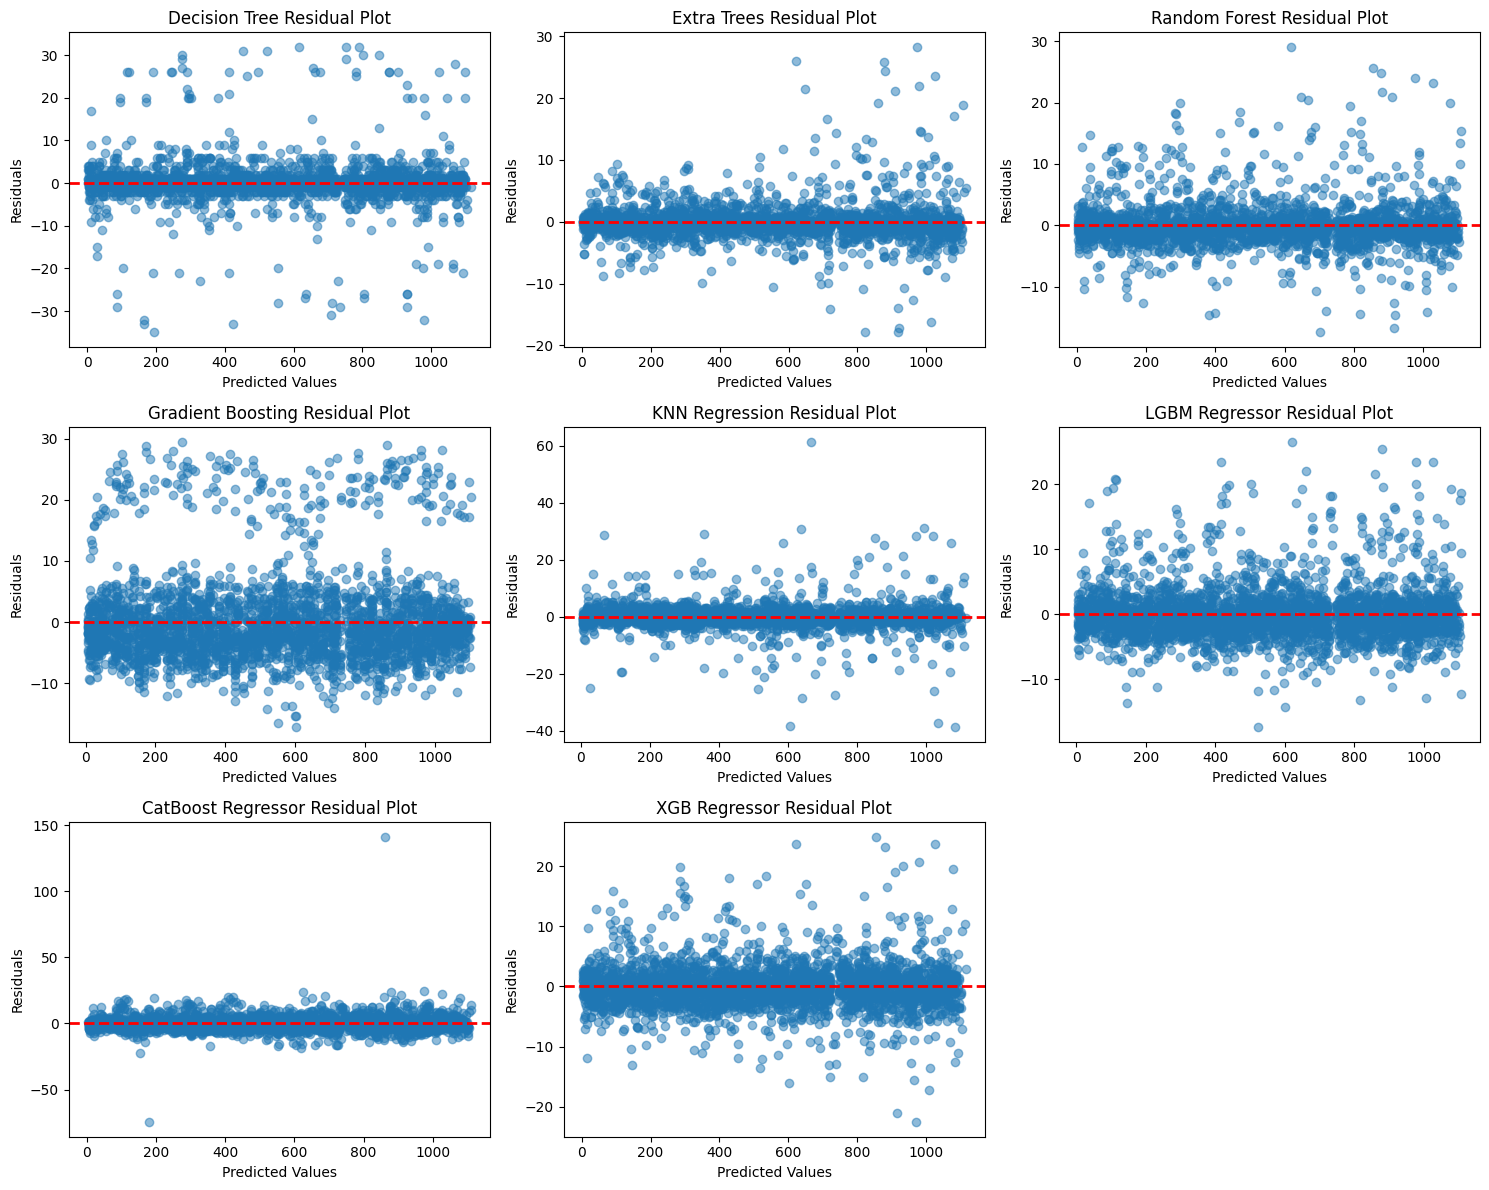

In [27]:
# Define the grid layout
rows, cols = 3, 3
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Calculate residuals
    residuals = y_test - y_pred

    # Residual plot for each model
    plt.subplot(rows, cols, idx)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.title(f'{model_name} Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

### A kernel density plot (KDE plot)

A kernel density plot (KDE plot) in regression analysis is used to visualize the distribution of residuals, which are the differences between the observed values (actual values) and the predicted values from a regression model. Here’s what a KDE plot can tell us:

What a KDE Plot in Regression Tells Us?

**- Residual Distribution:**

The plot shows how residuals are distributed across different values. Ideally, the residuals should be symmetrically distributed around zero, indicating that the model's predictions are unbiased and have no systematic errors.

**- Presence of Bias:**

If the KDE plot shows that residuals are skewed to one side, it suggests that the model might be biased in its predictions. For example, if residuals are mostly negative, the model tends to overestimate the target values.

**- Heteroscedasticity:**

A uniform spread of residuals suggests homoscedasticity, meaning the variance of the residuals is constant across all levels of predicted values. If the spread of the residuals changes (e.g., fans out or narrows down), it indicates heteroscedasticity, which can be a problem for certain types of regression models.

**- Outliers:**

Extreme peaks or outliers in the KDE plot indicate that there are data points where the model’s prediction errors are unusually large. This could suggest that there are outliers in the data or that the model is not performing well on certain instances.
Normality of Errors:

Many regression models assume that the residuals are normally distributed. A KDE plot can help visually assess whether this assumption holds. A normal distribution will appear as a bell-shaped curve centered around zero.

**What is Ideal:**

**- Centered Around Zero:**
The ideal KDE plot for residuals in a regression model should be centered around zero. This indicates that the model’s predictions are, on average, correct.

**- Symmetrical Shape:**

The plot should be symmetrical, suggesting that the model's errors are equally likely to be positive or negative.
Smooth and Single Peak:

The plot should ideally show a smooth, single peak around zero, indicating a normal distribution of residuals. A smooth, unimodal (single peak) distribution suggests the absence of multiple error patterns. There should be minimal tails or extreme values far from zero, indicating that there are no significant outliers or high-error predictions.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000472 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2031
[LightGBM] [Info] Number of data points in the train set: 11566, number of used features: 8
[LightGBM] [Info] Start training from score 559.662027


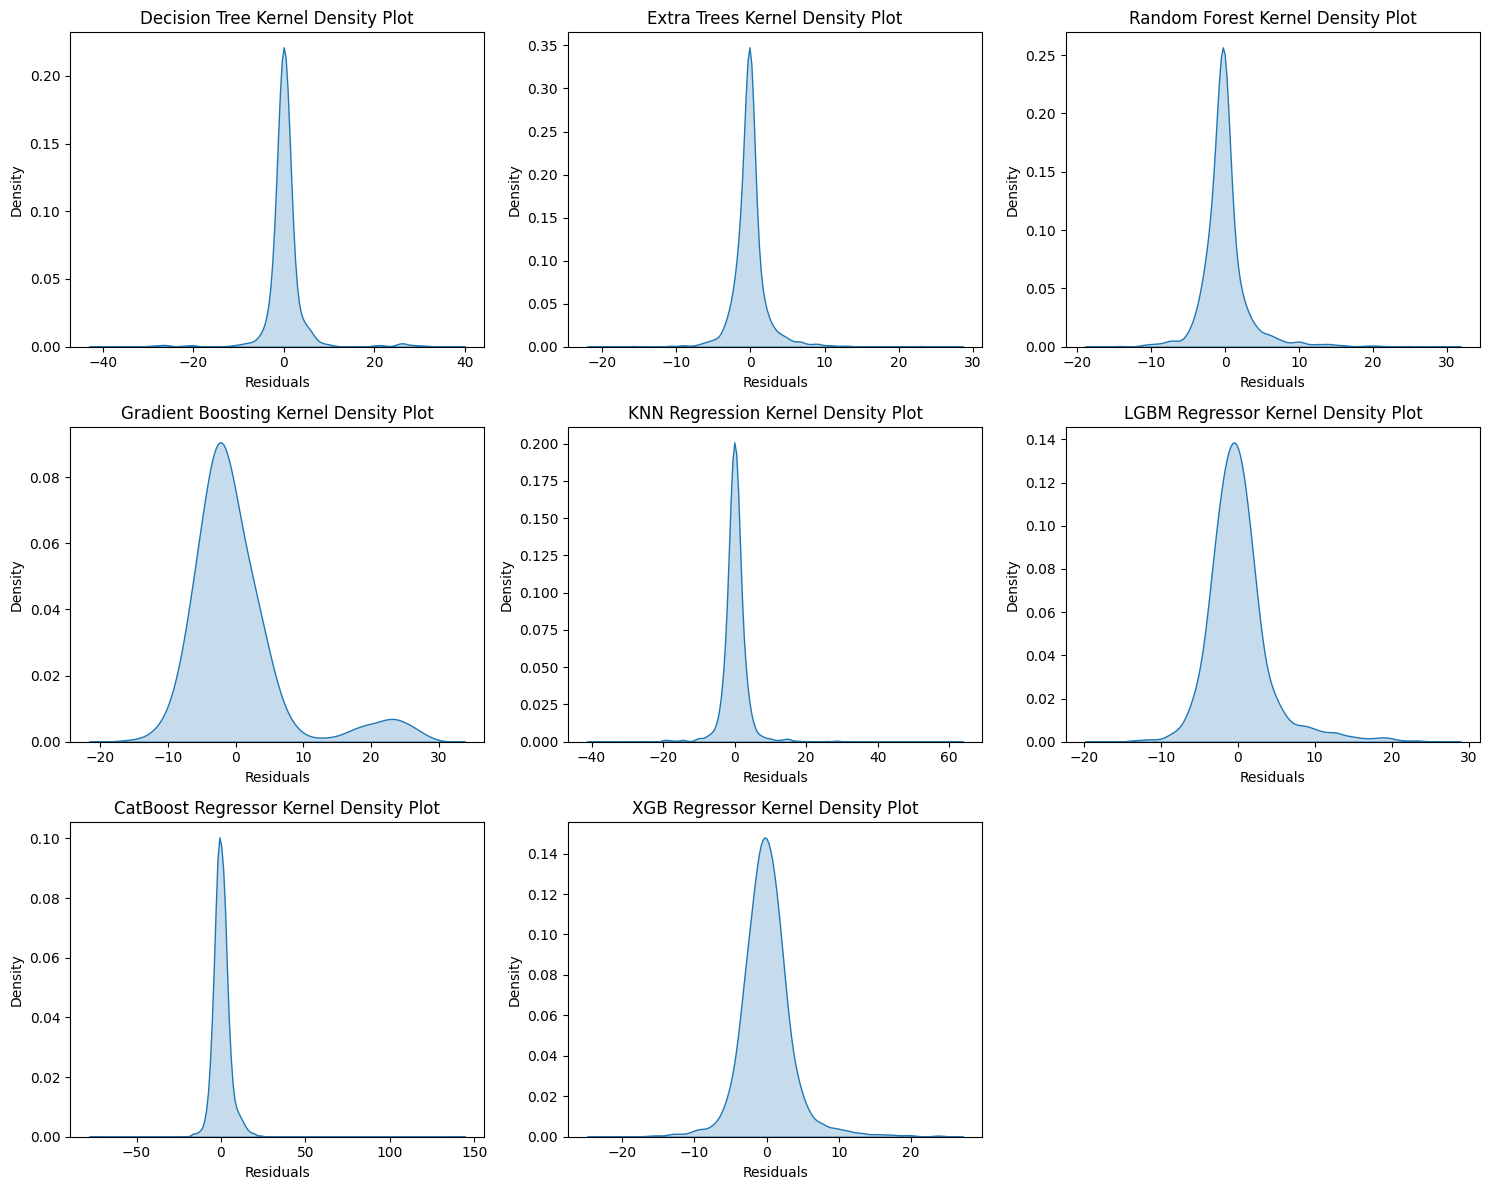

In [28]:
# Kernel Density Plot
# Define the grid layout
rows, cols = 3, 3
plt.figure(figsize=(15, 12))

# Loop over models
for idx, (model_name, model) in enumerate(models.items(), 1):
    # Fit the model to training data
    model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test_scaled)

    # Calculate residuals
    residuals = y_test - y_pred

    # Kernel density plot for residuals of each model
    plt.subplot(rows, cols, idx)
    sns.kdeplot(residuals, fill=True)
    plt.title(f'{model_name} Kernel Density Plot')
    plt.xlabel('Residuals')
    plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()